# MH6804: Python For Data Analysis

# Group Project: Credit Card Fraud

# Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
import os

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/creditcardfraud/creditcard.csv


# Load the data

In [ ]:
# Assuming the files are in the current working directory after you download them from above links
df_part1 = pd.read_csv('creditcard_part_1.csv')
df_part2 = pd.read_csv('creditcard_part_2.csv')

# Concatenate the DataFrames into one
df = pd.concat([df_part1, df_part2], ignore_index=True)

df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


# EDA: Exploration on the data

In [4]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
df.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [7]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [8]:
# Finding the missing value
df.isnull().sum()


Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [9]:
#cross check if there is any nna value?
df.isna().any()

Time      False
V1        False
V2        False
V3        False
V4        False
V5        False
V6        False
V7        False
V8        False
V9        False
V10       False
V11       False
V12       False
V13       False
V14       False
V15       False
V16       False
V17       False
V18       False
V19       False
V20       False
V21       False
V22       False
V23       False
V24       False
V25       False
V26       False
V27       False
V28       False
Amount    False
Class     False
dtype: bool

# Finding the data distribution 

In [10]:
#finding the count of each value for that parameter. meaning we are finding how many fraud and real
df['Class'].value_counts()


Class
0    284315
1       492
Name: count, dtype: int64

#### Class -> Real = 0; Fraud = 1

In [11]:
df_real = df[df['Class'] == 0]
df_fraud = df[df['Class'] == 1]

type(df_real)

type(df_fraud)

pandas.core.frame.DataFrame

In [12]:
df_real.sum()

Time      2.696392e+10
V1        2.347799e+03
V2       -1.782899e+03
V3        3.460374e+03
V4       -2.234678e+03
V5        1.550403e+03
V6        6.876865e+02
V7        2.739816e+03
V8       -2.807529e+02
V9        1.269912e+03
V10       2.793026e+03
V11      -1.869685e+03
V12       3.079621e+03
V13       5.379224e+01
V14       3.430088e+03
V15       4.572094e+01
V16       2.036853e+03
V17       3.279592e+03
V18       1.105184e+03
V19      -3.348844e+02
V20      -1.831811e+02
V21      -3.510855e+02
V22      -6.912050e+00
V23       1.983152e+01
V24       5.172411e+01
V25      -2.039285e+01
V26      -2.541088e+01
V27      -8.392280e+01
V28      -3.722831e+01
Amount    2.510246e+07
Class     0.000000e+00
dtype: float64

In [13]:
df_fraud.sum()

Time      3.972743e+07
V1       -2.347799e+03
V2        1.782899e+03
V3       -3.460374e+03
V4        2.234678e+03
V5       -1.550403e+03
V6       -6.876865e+02
V7       -2.739816e+03
V8        2.807529e+02
V9       -1.269912e+03
V10      -2.793026e+03
V11       1.869685e+03
V12      -3.079621e+03
V13      -5.379224e+01
V14      -3.430088e+03
V15      -4.572094e+01
V16      -2.036853e+03
V17      -3.279592e+03
V18      -1.105184e+03
V19       3.348844e+02
V20       1.831811e+02
V21       3.510855e+02
V22       6.912050e+00
V23      -1.983152e+01
V24      -5.172411e+01
V25       2.039285e+01
V26       2.541088e+01
V27       8.392280e+01
V28       3.722831e+01
Amount    6.012797e+04
Class     4.920000e+02
dtype: float64

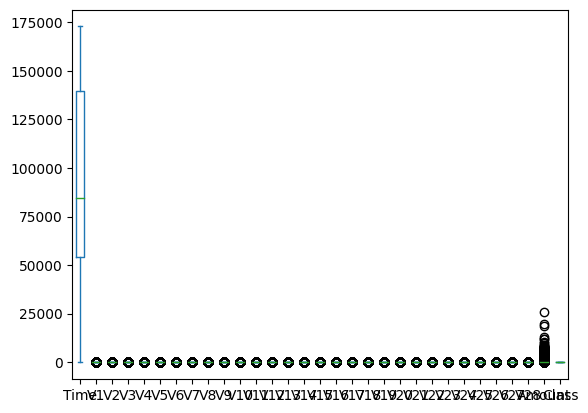

In [14]:
ax = df_real.plot.box()

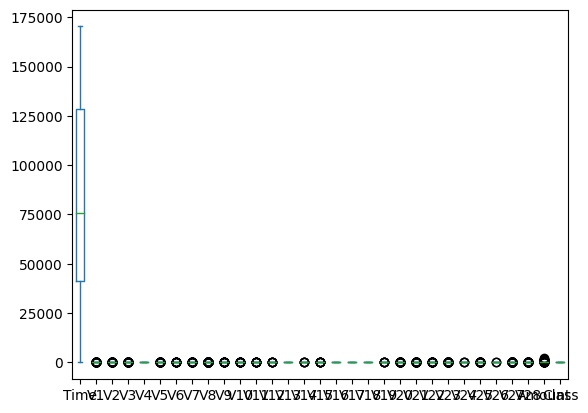

In [15]:
ax = df_fraud.plot.box()

In [16]:
#finding the count of each value for that parameter. meaning we are finding how many fraud and real
df['Class'].value_counts()


Class
0    284315
1       492
Name: count, dtype: int64

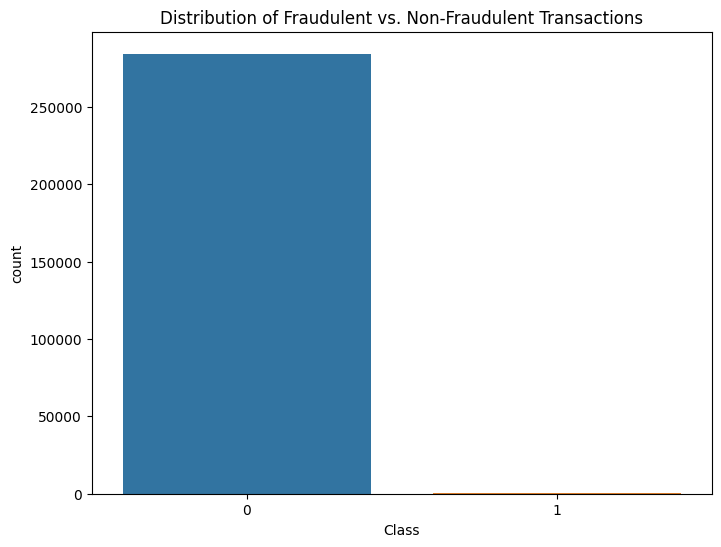

In [17]:
# Visualizing the distribution of the 'Class' column (Target variable)
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Class')
plt.title('Distribution of Fraudulent vs. Non-Fraudulent Transactions')
plt.show()

### Fraud is too few

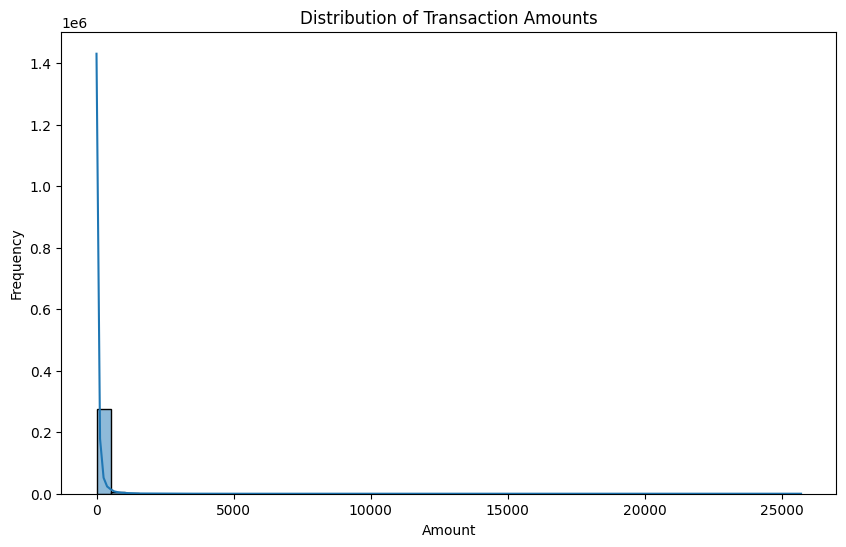

In [18]:
# Visualizing the distribution of transaction amounts
plt.figure(figsize=(10, 6))
sns.histplot(df['Amount'], bins=50, kde=True)
plt.title('Distribution of Transaction Amounts')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.show()

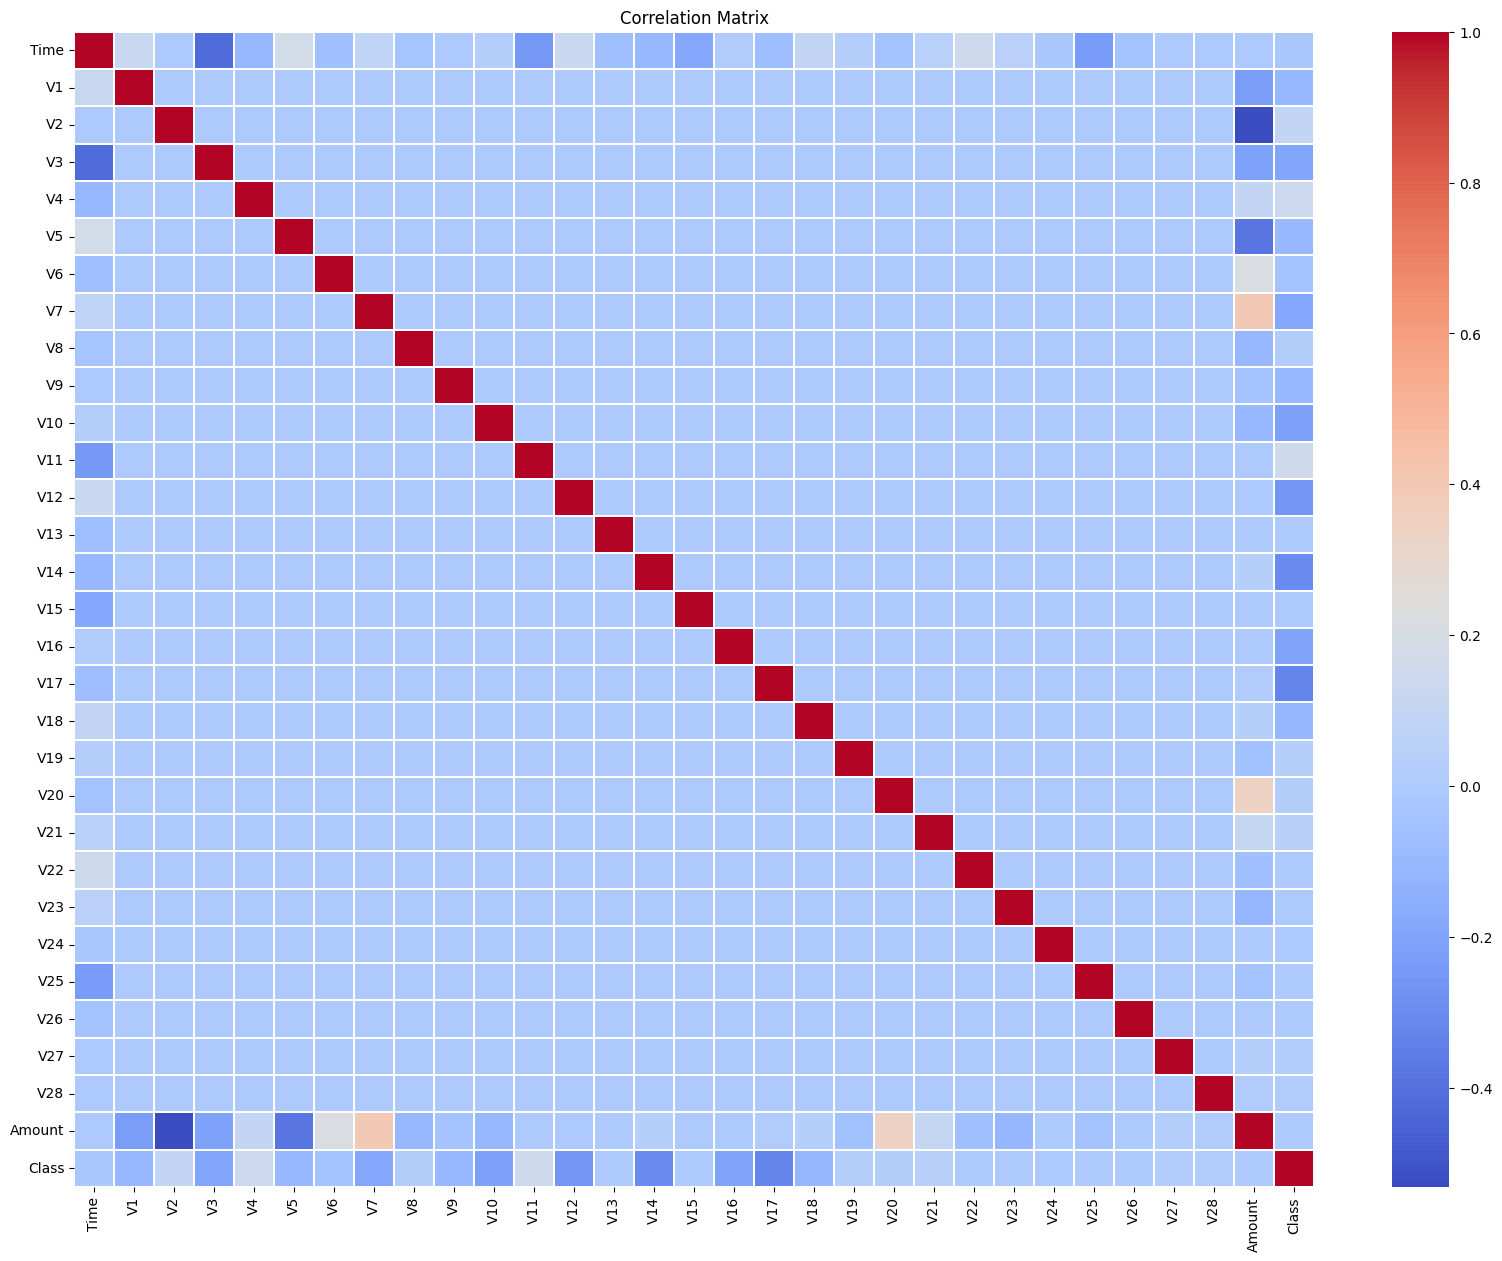

In [19]:
# Correlation matrix to understand relationships between features
plt.figure(figsize=(20, 15))
sns.heatmap(df.corr(), cmap='coolwarm', annot=False, fmt=".1f", linewidths=0.1)
plt.title('Correlation Matrix')
plt.show()

<Axes: title={'center': 'Correlation with class'}>

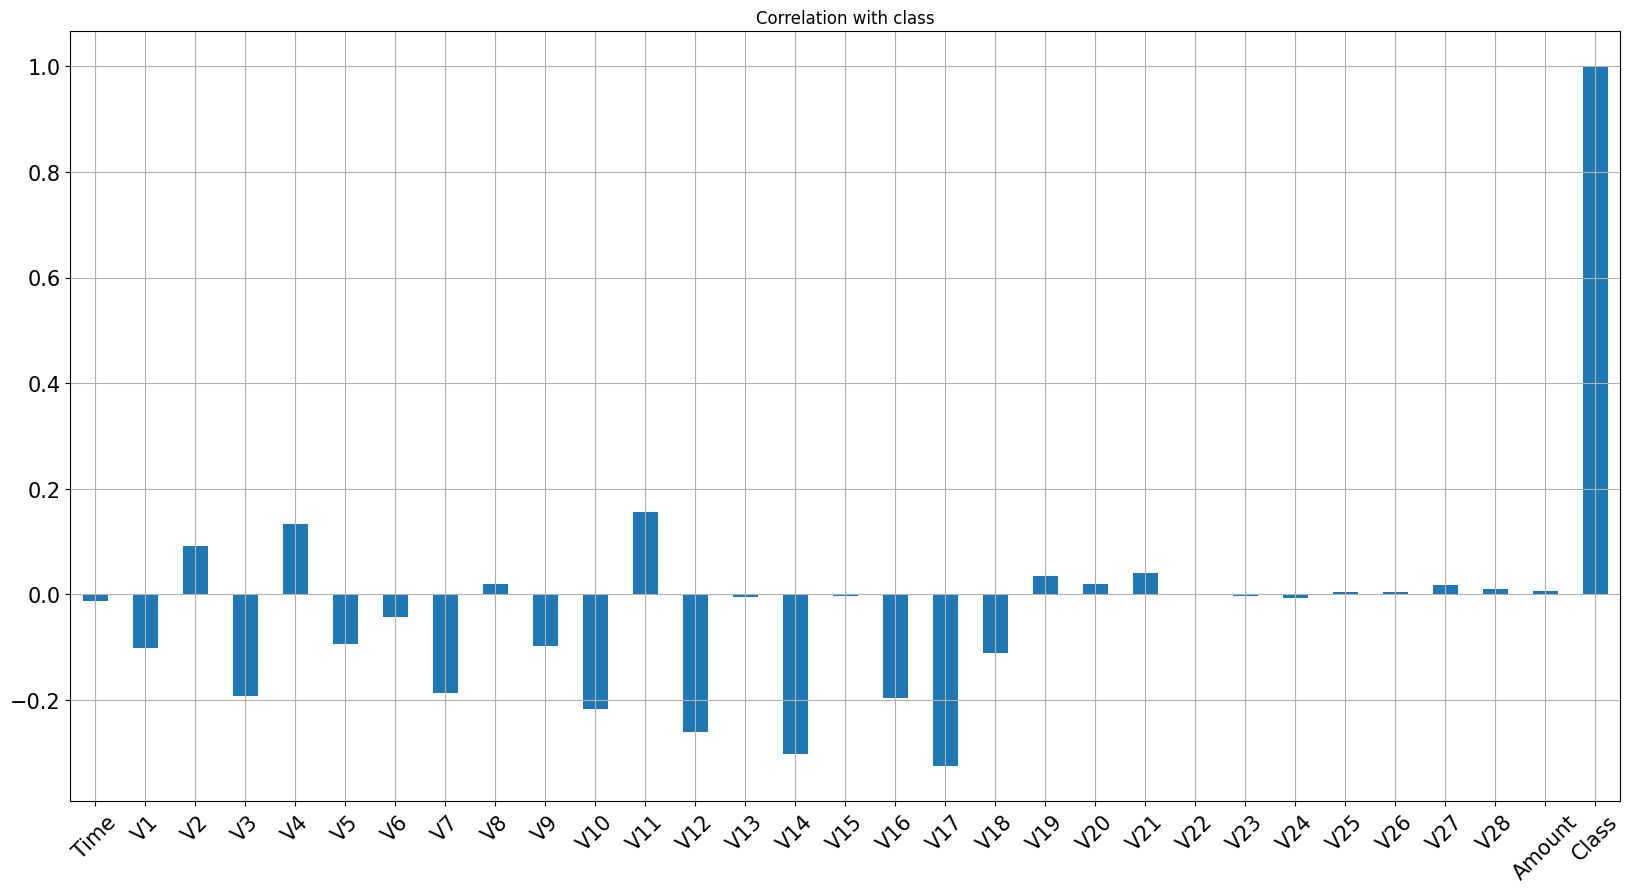

In [20]:
df.corrwith(df.Class).plot.bar(
        figsize = (20, 10), title = "Correlation with class", fontsize = 15,
        rot = 45, grid = True)

### We can see that the columns that relatively correlates with the class are:

### Positive Correlation
- V11

### Negative Correlation
- V3
- V10
- V12
- V14
- V16
- V17


# Feature Scaling

#### We normalize the "Amount" column so that its large numbers don't overshadow or unfairly impact the other pieces of information when we run our analysis.

In [21]:
# Normalizing the amount data
from sklearn.preprocessing import StandardScaler
df['normalizedAmount'] = StandardScaler().fit_transform(df['Amount'].values.reshape(-1,1))

df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V22,V23,V24,V25,V26,V27,V28,Amount,Class,normalizedAmount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0,0.244964
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0,-0.342475
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0,1.160686
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0,0.140534
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0,-0.073403


In [22]:
df["normalizedAmount"].max()

102.36224270928423

In [23]:
df["normalizedAmount"].min()

-0.35322939296682354

#### Dropping the "Time" column because the exact time of a transaction may not provide meaningful information for detecting fraud, and leaving it in might introduce noise or distractions to the analysis.

In [24]:
#dropping the time
df_drop_time = df.drop(['Time'],axis=1)
df_drop_time.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Amount,Class,normalizedAmount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0,0.244964
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0,-0.342475
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0,1.160686
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0,0.140534
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0,-0.073403


In [25]:
df_drop_time_real = df_drop_time[df_drop_time['Class'] == 0]
df_drop_time_fraud = df_drop_time[df_drop_time['Class'] == 1]

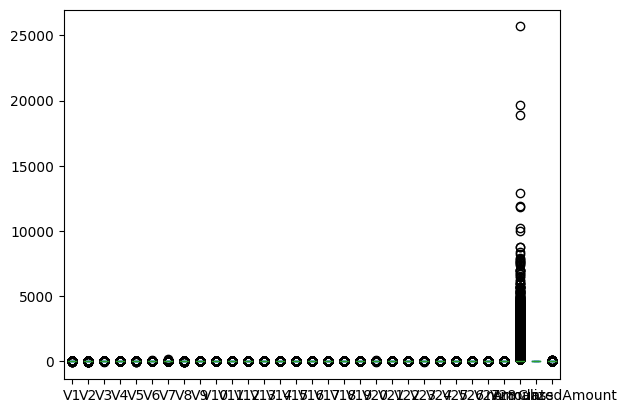

In [26]:
ax = df_drop_time_real.plot.box()


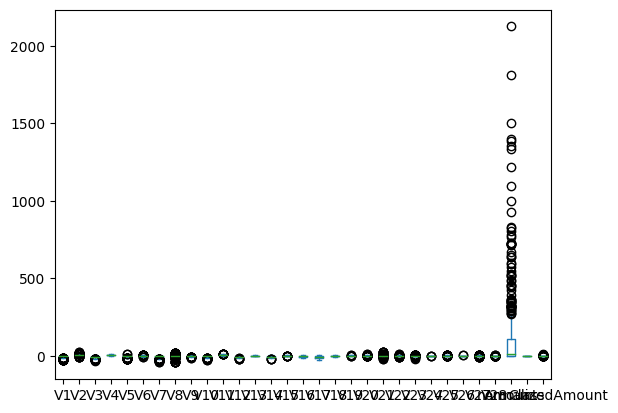

In [27]:
ax = df_drop_time_fraud.plot.box()

### showing the pairplot for relatively high correlation data

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


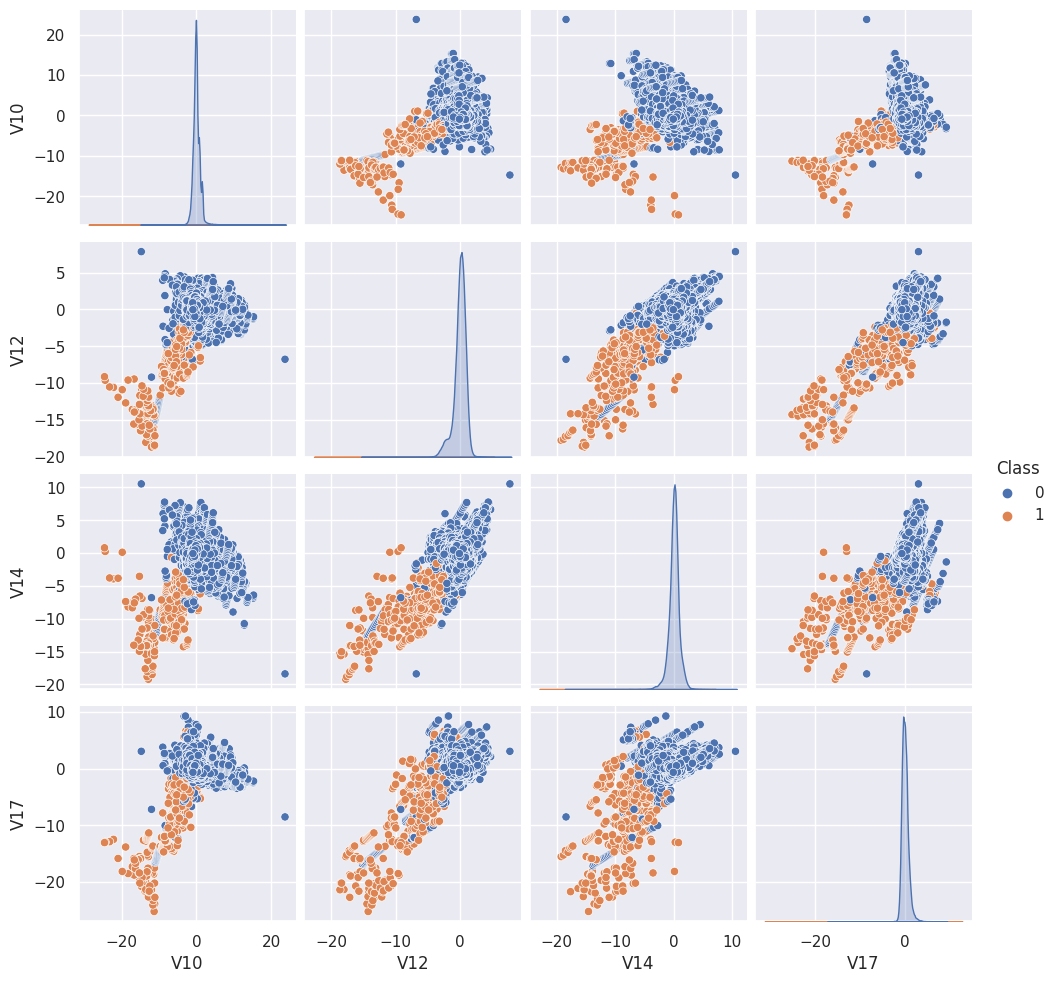

In [28]:
# Calculating columns with high correlation to 'Class'
correlation_with_class = df_drop_time.corrwith(df_drop_time.Class)
high_correlation_columns = correlation_with_class[correlation_with_class.abs() > 0.2].index.drop('Class').tolist()

# Plotting the pairplot
sns.set()
sns.pairplot(df_drop_time[high_correlation_columns + ['Class']], hue='Class', height=2.5)
plt.show()


/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


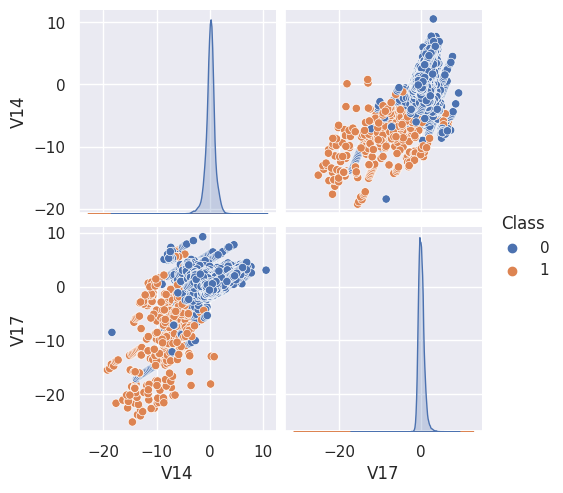

In [29]:
# Calculating columns with high correlation to 'Class'
correlation_with_class = df_drop_time.corrwith(df_drop_time.Class)
high_correlation_columns = correlation_with_class[correlation_with_class.abs() > 0.3].index.tolist()

# Plotting the pairplot for all these columns against each other, including 'Class'
sns.set()
sns.pairplot(df_drop_time[high_correlation_columns], hue='Class', height=2.5)
plt.show()

# Spliting the Data

In [30]:
X = df_drop_time.iloc[:, df_drop_time.columns != 'Class'].values
y = df_drop_time.iloc[:, df_drop_time.columns == 'Class'].values.ravel()  # ravel might be necessary to create a 1D array

In [31]:
#what is the shape of the data?
X.shape

(284807, 30)

In [32]:
#what is the shape of the data?
y.shape

(284807,)

# Exploring the Model

In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state=0)

In [34]:
print(f"X_train shape:{X_train.shape}")
print(f"y_train shape:{y_train.shape}")
print(f"X_test shape:{X_test.shape}")
print(f"y_test shape:{y_test.shape}")

X_train shape:(199364, 30)
y_train shape:(199364,)
X_test shape:(85443, 30)
y_test shape:(85443,)


### *Applying SMOTE to handle the class imbalance*

In [35]:
from imblearn.over_sampling import SMOTE
from collections import Counter
# Summarize class distribution
print("Before SMOTE: ", Counter(y_train))

# Apply SMOTE
sm = SMOTE(random_state=0)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)



# Summarize the new class distribution
print("After SMOTE: ", Counter(y_train_res))

# model.fit(X_train_res, y_train_res)

Before SMOTE:  Counter({0: 199019, 1: 345})
After SMOTE:  Counter({0: 199019, 1: 199019})


In [36]:
# Summarize class distribution
print("Before SMOTE: ", Counter(y_test))

# Generate SMOTE-resampled test data
X_test_res, y_test_res = sm.fit_resample(X_test, y_test)

# Summarize the new class distribution
print("After SMOTE: ", Counter(y_test_res))

Before SMOTE:  Counter({0: 85296, 1: 147})
After SMOTE:  Counter({0: 85296, 1: 85296})


# Decision Tree

In [39]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

dt_classifier = DecisionTreeClassifier(random_state=0, criterion='gini', splitter='best', min_samples_leaf=1, min_samples_split=2)
dt_classifier.fit(X_train, y_train)

# Predicting Test Set
y_pred = dt_classifier.predict(X_test)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Extracting TP, FP, TN, and FN from the confusion matrix
TN, FP, FN, TP = confusion_matrix(y_test, y_pred).ravel()

# Computing TPR, FPR, TNR, and FNR
TPR = TP / (TP + FN)  # Same as Recall
FPR = FP / (FP + TN)
TNR = TN / (TN + FP)
FNR = FN / (TP + FN)

results = pd.DataFrame([['Decision tree', acc, prec, rec, f1, TPR, FPR, TNR, FNR]],
               columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'TPR', 'FPR', 'TNR', 'FNR'])


In [40]:
results

,Model,Accuracy,Precision,Recall,F1 Score,TPR,FPR,TNR,FNR
0,Decision tree,0.999228,0.791367,0.748299,0.769231,0.748299,0.00034,0.99966,0.251701


### Random Forest

In [41]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score

rf_classifier = RandomForestClassifier(random_state=0, n_estimators=100, criterion='entropy')
rf_classifier.fit(X_train, y_train)

# Predicting Test Set
y_pred = rf_classifier.predict(X_test)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)  # This is the same as TPR
f1 = f1_score(y_test, y_pred)

# Extracting TP, FP, TN, and FN from the confusion matrix
TN, FP, FN, TP = confusion_matrix(y_test, y_pred).ravel()

# Computing TPR, FPR, TNR, and FNR
TPR = TP / (TP + FN)  
FPR = FP / (FP + TN)
TNR = TN / (TN + FP)
FNR = FN / (TP + FN)

model_results = pd.DataFrame([['Random Forest (n=100)', acc, prec, rec, f1, TPR, FPR, TNR, FNR]],
               columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'TPR', 'FPR', 'TNR', 'FNR'])

results = pd.concat([results, model_results]).reset_index(drop=True)


In [42]:
results

,Model,Accuracy,Precision,Recall,F1 Score,TPR,FPR,TNR,FNR
0,Decision tree,0.999228,0.791367,0.748299,0.769231,0.748299,0.000340,0.999660,0.251701
1,Random Forest (n=100),0.999508,0.941176,0.761905,0.842105,0.761905,0.000082,0.999918,0.238095


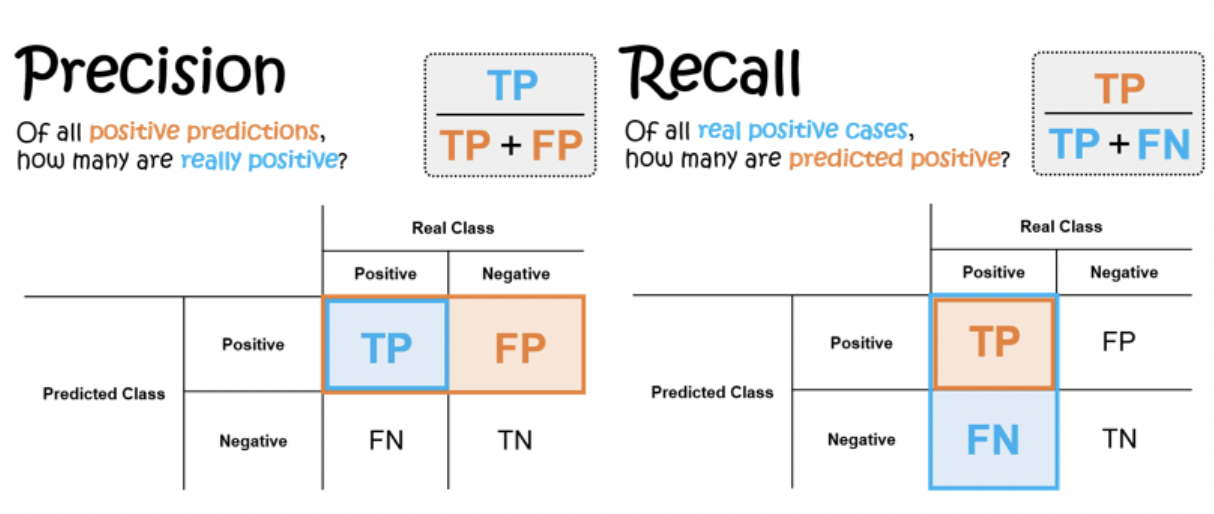

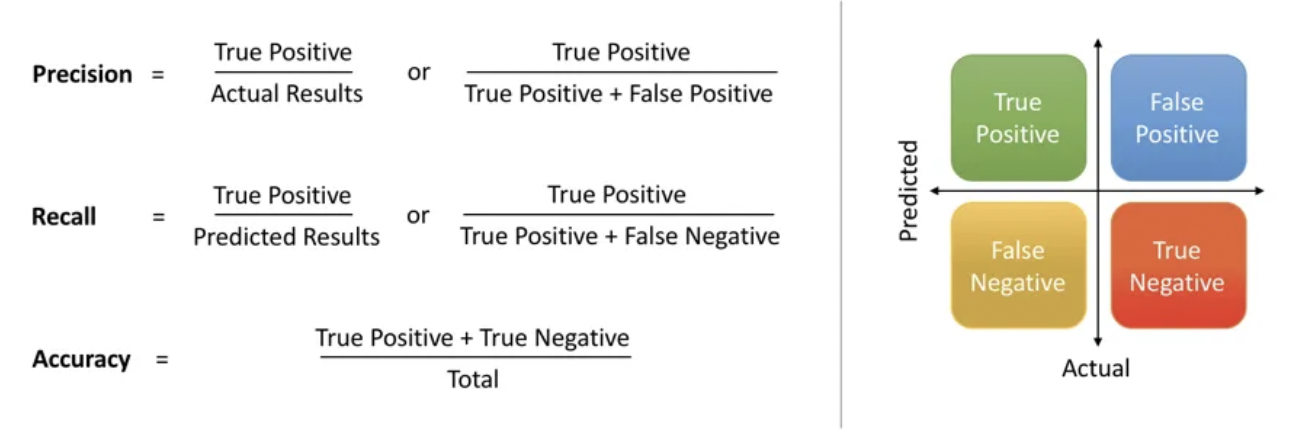

## **Models with SMOTE**

### Decision Tree with SMOTE

In [43]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

dts_classifier = DecisionTreeClassifier(random_state=0, criterion='gini', splitter='best', min_samples_leaf=1, min_samples_split=2)
dts_classifier.fit(X_train_res, y_train_res)

# Predicting Test Set
y_pred = dts_classifier.predict(X_test)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Extracting TP, FP, TN, and FN from the confusion matrix
TN, FP, FN, TP = confusion_matrix(y_test, y_pred).ravel()

# Computing TPR, FPR, TNR, and FNR
TPR = TP / (TP + FN)  # Same as Recall
FPR = FP / (FP + TN)
TNR = TN / (TN + FP)
FNR = FN / (TP + FN)

model_results = pd.DataFrame([['Decision tree SMOTE', acc, prec, rec, f1, TPR, FPR, TNR, FNR]],
               columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'TPR', 'FPR', 'TNR', 'FNR'])

results = pd.concat([results, model_results]).reset_index(drop=True)



In [44]:
results

,Model,Accuracy,Precision,Recall,F1 Score,TPR,FPR,TNR,FNR
0,Decision tree,0.999228,0.791367,0.748299,0.769231,0.748299,0.000340,0.999660,0.251701
1,Random Forest (n=100),0.999508,0.941176,0.761905,0.842105,0.761905,0.000082,0.999918,0.238095
2,Decision tree SMOTE,0.997273,0.360390,0.755102,0.487912,0.755102,0.002310,0.997690,0.244898


### Random Forest with SMOTE

In [45]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score

rfs_classifier = RandomForestClassifier(random_state=0, n_estimators=100, criterion='entropy')
rfs_classifier.fit(X_train_res, y_train_res)

# Predicting Test Set
y_pred = rfs_classifier.predict(X_test)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)  # This is the same as TPR
f1 = f1_score(y_test, y_pred)

# Extracting TP, FP, TN, and FN from the confusion matrix
TN, FP, FN, TP = confusion_matrix(y_test, y_pred).ravel()

# Computing TPR, FPR, TNR, and FNR
TPR = TP / (TP + FN)  
FPR = FP / (FP + TN)
TNR = TN / (TN + FP)
FNR = FN / (TP + FN)

model_results = pd.DataFrame([['Random Forest (n=100)SMOTE', acc, prec, rec, f1, TPR, FPR, TNR, FNR]],
               columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'TPR', 'FPR', 'TNR', 'FNR'])

results = pd.concat([results, model_results]).reset_index(drop=True)


In [46]:
results

,Model,Accuracy,Precision,Recall,F1 Score,TPR,FPR,TNR,FNR
0,Decision tree,0.999228,0.791367,0.748299,0.769231,0.748299,0.000340,0.999660,0.251701
1,Random Forest (n=100),0.999508,0.941176,0.761905,0.842105,0.761905,0.000082,0.999918,0.238095
2,Decision tree SMOTE,0.997273,0.360390,0.755102,0.487912,0.755102,0.002310,0.997690,0.244898
3,Random Forest (n=100)SMOTE,0.999544,0.885714,0.843537,0.864111,0.843537,0.000188,0.999812,0.156463


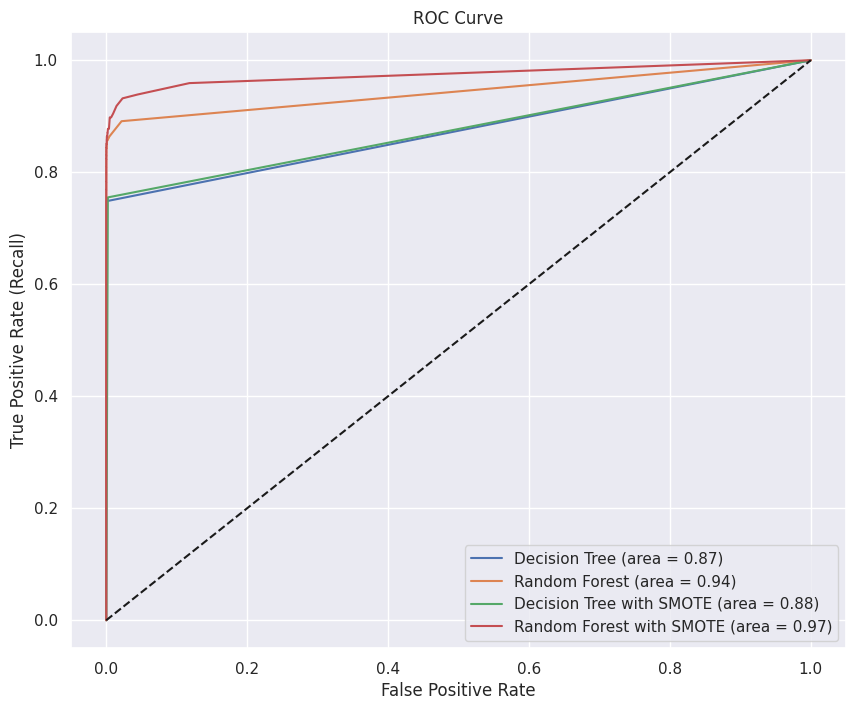

In [47]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Function to calculate and plot ROC AUC
def plot_roc_auc(classifier, X_test, y_test, model_name):
    # Calculate the probabilities of each class
    y_prob = classifier.predict_proba(X_test)[:, 1]

    # Calculate ROC AUC
    roc_auc = roc_auc_score(y_test, y_prob)

    # Calculate ROC Curve
    fpr, tpr, thresholds = roc_curve(y_test, y_prob)

    # Plot ROC Curve
    plt.plot(fpr, tpr, label=f'{model_name} (area = %0.2f)' % roc_auc)

    return roc_auc

# Plotting both ROC Curves
plt.figure(figsize=(10, 8))

# Plot ROC for Decision Tree & Random Forest without SMOTE
roc_auc_dt = plot_roc_auc(dt_classifier, X_test, y_test, 'Decision Tree')
roc_auc_rf = plot_roc_auc(rf_classifier, X_test, y_test, 'Random Forest')

# Plot ROC for Decision Tree & Random Forest with SMOTE
roc_auc_dt_smote = plot_roc_auc(dts_classifier, X_test, y_test, 'Decision Tree with SMOTE')
roc_auc_rf_smote = plot_roc_auc(rfs_classifier, X_test, y_test, 'Random Forest with SMOTE')

# Plot diagonal
plt.plot([0, 1], [0, 1], 'k--')  # Dashed diagonal
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

# Append ROC AUC to the results dataframe
results.loc[results['Model'] == 'Decision tree', 'ROC AUC'] = roc_auc_dt
results.loc[results['Model'] == 'Random Forest (n=100)', 'ROC AUC'] = roc_auc_rf
results.loc[results['Model'] == 'Decision tree with SMOTE', 'ROC AUC'] = roc_auc_dt_smote
results.loc[results['Model'] == 'Random Forest (n=100) with SMOTE', 'ROC AUC'] = roc_auc_rf_smote


### Note: Please note the result above is after implementing SMOTE without Cross Validation

# SMOTE with Cross-Validation for Data imbalance

In [48]:
from imblearn.pipeline import Pipeline as imbpipeline
from sklearn.model_selection import cross_validate
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE

# Define the classifier
dt_classifier = DecisionTreeClassifier(random_state=0)
rf_classifier = RandomForestClassifier(random_state=0, n_estimators=100, criterion='entropy')

# Define scoring metrics you want to use
scoring = {'accuracy': 'accuracy', 'precision': 'precision', 'recall': 'recall', 'f1': 'f1'}

# Create a pipeline with SMOTE and Decision Tree
pipeline_dt = imbpipeline([
    ('SMOTE', SMOTE(random_state=0)),
    ('classifier', dt_classifier)
])

# Create a pipeline with SMOTE and Random Forest
pipeline_rf = imbpipeline([
    ('SMOTE', SMOTE(random_state=0)),
    ('classifier', rf_classifier)
])

# Perform cross-validation and store results
results_dt = cross_validate(pipeline_dt, X, y, cv=5, scoring=scoring)
results_rf = cross_validate(pipeline_rf, X, y, cv=5, scoring=scoring)



# Print the results
print("Decision Tree with Cross-Validation and SMOTE:", results_dt)
print("Random Forest with Cross-Validation and SMOTE:", results_rf)


Decision Tree with Cross-Validation and SMOTE: {'fit_time': array([39.44642639, 43.74704814, 36.81460595, 37.78216553, 41.53261375]), 'score_time': array([0.05505323, 0.05104327, 0.05122495, 0.05178571, 0.051162  ]), 'test_accuracy': array([0.99561111, 0.99801622, 0.99554081, 0.99619038, 0.99808641]), 'test_precision': array([0.22939068, 0.46022727, 0.23825503, 0.25910931, 0.46206897]), 'test_recall': array([0.64646465, 0.81818182, 0.7244898 , 0.65306122, 0.68367347]), 'test_f1': array([0.33862434, 0.58909091, 0.35858586, 0.37101449, 0.55144033])}
Random Forest with Cross-Validation and SMOTE: {'fit_time': array([309.80171394, 321.33157802, 293.23909497, 317.56925702,
       309.69245005]), 'score_time': array([0.5655973 , 0.54614329, 0.55229616, 0.56046653, 0.52387142]), 'test_accuracy': array([0.99906956, 0.99966644, 0.99920999, 0.99947332, 0.99943821]), 'test_precision': array([0.67164179, 0.94444444, 0.78494624, 0.86170213, 0.89285714]), 'test_recall': array([0.90909091, 0.85858586

In [49]:
type(results_dt)

dict

In [50]:
results_dt = pd.DataFrame([results_dt])
results_rf = pd.DataFrame([results_rf])
results_dt['classifier'] = 'Decision Tree'
results_rf['classifier'] = 'Random Forest'

In [51]:
results_dt

,fit_time,score_time,test_accuracy,test_precision,test_recall,test_f1,classifier
0,"[39.44642639160156, 43.747048139572144, 36.814...","[0.0550532341003418, 0.05104327201843262, 0.05...","[0.995611109160493, 0.9980162213405428, 0.9955...","[0.22939068100358423, 0.4602272727272727, 0.23...","[0.6464646464646465, 0.8181818181818182, 0.724...","[0.3386243386243386, 0.5890909090909091, 0.358...",Decision Tree


In [52]:
results_rf

,fit_time,score_time,test_accuracy,test_precision,test_recall,test_f1,classifier
0,"[309.80171394348145, 321.3315780162811, 293.23...","[0.5655972957611084, 0.5461432933807373, 0.552...","[0.9990695551420246, 0.9996664442961974, 0.999...","[0.6716417910447762, 0.9444444444444444, 0.784...","[0.9090909090909091, 0.8585858585858586, 0.744...","[0.7725321888412017, 0.8994708994708994, 0.764...",Random Forest


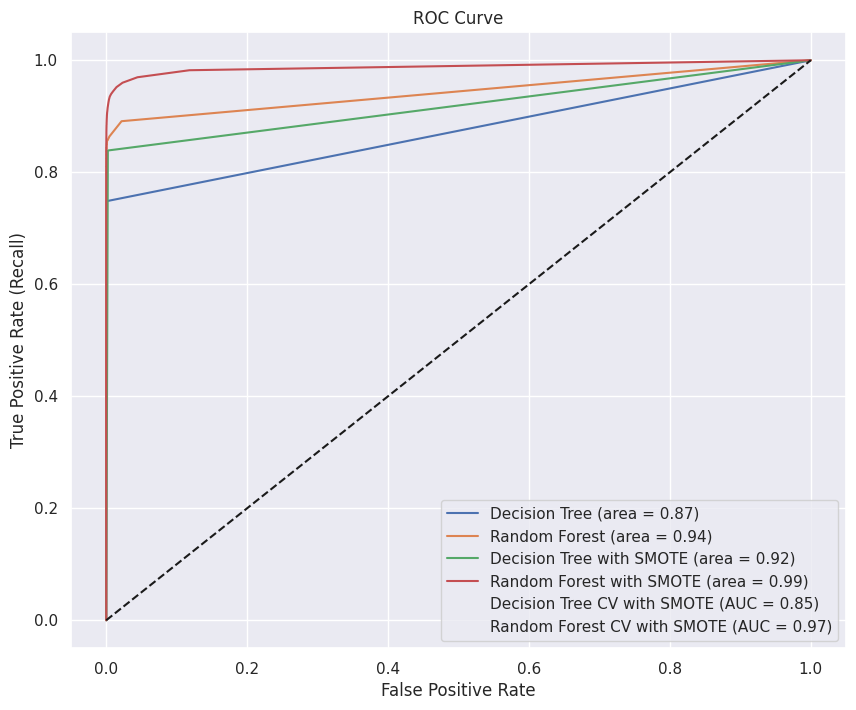

                         Model  Accuracy Precision    Recall  F1 Score  \
0                Decision tree  0.999228  0.791367  0.748299  0.769231   
1        Random Forest (n=100)  0.999508  0.941176  0.761905  0.842105   
2          Decision tree SMOTE  0.997273   0.36039  0.755102  0.487912   
3   Random Forest (n=100)SMOTE  0.999544  0.885714  0.843537  0.864111   
4  Decision Tree CV with SMOTE                                           
5  Random Forest CV with SMOTE                                           

        TPR       FPR       TNR       FNR   ROC AUC    CV AUC  
0  0.748299   0.00034   0.99966  0.251701   0.87398            
1  0.761905  0.000082  0.999918  0.238095  0.943982            
2  0.755102   0.00231   0.99769  0.244898                      
3  0.843537  0.000188  0.999812  0.156463                      
4                                                    0.851184  
5                                                    0.970128  


In [53]:
# Define the classifier
#dt_classifier = DecisionTreeClassifier(random_state=0)
#rf_classifier = RandomForestClassifier(random_state=0, n_estimators=100, criterion='entropy')

#dts_classifier = DecisionTreeClassifier(random_state=0, criterion='gini', splitter='best', min_samples_leaf=1, min_samples_split=2)

# Fit the Decision Tree classifier without SMOTE
dt_classifier.fit(X_train, y_train)

# Fit the Random Forest classifier without SMOTE
rf_classifier.fit(X_train, y_train)

# Fit the Decision Tree classifier with SMOTE
dts_classifier.fit(X_train_res, y_train_res)

# Fit the Random Forest classifier with SMOTE
rfs_classifier.fit(X_train_res, y_train_res)

# Define the AUC score within cross-validation for Decision Tree
auc_scores_dt = cross_validate(pipeline_dt, X, y, cv=5, scoring='roc_auc')

# Define the AUC score within cross-validation for Random Forest
auc_scores_rf = cross_validate(pipeline_rf, X, y, cv=5, scoring='roc_auc')

# Average AUC scores
avg_auc_dt = np.mean(auc_scores_dt['test_score'])
avg_auc_rf = np.mean(auc_scores_rf['test_score'])

# Add the cross-validated AUC scores to results DataFrame
results_cv = pd.DataFrame({
    'Model': ['Decision Tree CV with SMOTE', 'Random Forest CV with SMOTE'],
    'CV AUC': [avg_auc_dt, avg_auc_rf]
})

# Plotting ROC curves for all configurations
plt.figure(figsize=(10, 8))

# Plot ROC for Decision Tree without SMOTE
roc_auc_dt = plot_roc_auc(dt_classifier, X_test, y_test, 'Decision Tree')

# Plot ROC for Random Forest without SMOTE
roc_auc_rf = plot_roc_auc(rf_classifier, X_test, y_test, 'Random Forest')

# Plot ROC for Decision Tree with SMOTE
roc_auc_dt_smote = plot_roc_auc(dts_classifier, X_test_res, y_test_res, 'Decision Tree with SMOTE')

# Plot ROC for Random Forest with SMOTE
roc_auc_rf_smote = plot_roc_auc(rfs_classifier, X_test_res, y_test_res, 'Random Forest with SMOTE')

# Add a line for the average cross-validated AUC for Decision Tree with SMOTE
plt.plot(np.nan, np.nan, ' ', label=f'Decision Tree CV with SMOTE (AUC = {avg_auc_dt:.2f})')

# Add a line for the average cross-validated AUC for Random Forest with SMOTE
plt.plot(np.nan, np.nan, ' ', label=f'Random Forest CV with SMOTE (AUC = {avg_auc_rf:.2f})')

# Plot diagonal
plt.plot([0, 1], [0, 1], 'k--')  # Dashed diagonal
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

# Combine the results DataFrame with the cross-validation results
results_combined = pd.concat([results, results_cv], ignore_index=True, sort=False)
results_combined.fillna('', inplace=True)  # Fill NaN values for neatness

# Display the combined results
print(results_combined)


### Checking the number of Dimension

In [54]:
# Verify the shape of the data
print("X_train shape:", X_train.shape)  # Should be (number_of_samples, 29)
print("X_test shape:", X_test.shape)    # Should be (number_of_samples, 29)

# Correct the input dimension if necessary
# If the number of features is actually 30, change the `input_dim` to 30 as follows:
#classifier.add(Dense(units=15, kernel_initializer='uniform', activation='relu', input_dim=30))


X_train shape: (199364, 30)
X_test shape: (85443, 30)


### ANN: Artificial Neural Network

In [ ]:
# Importing the Keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Function to calculate and plot ROC AUC
def plot_roc_auc(classifier, X_test, y_test, model_name):
    # Calculate the probabilities of each class
    y_prob = classifier.predict_proba(X_test)[:, 1]

    # Calculate ROC AUC
    roc_auc = roc_auc_score(y_test, y_prob)

    # Calculate ROC Curve
    fpr, tpr, thresholds = roc_curve(y_test, y_prob)

    # Plot ROC Curve
    plt.plot(fpr, tpr, label=f'{model_name} (area = %0.2f)' % roc_auc)

    return roc_auc

# Initialising the ANN
classifier = Sequential()

# Adding the input layer and the first hidden layer
#classifier.add(Dense(units=15, kernel_initializer='uniform', activation='relu', input_dim=29))
classifier.add(Dense(units=15, kernel_initializer='uniform', activation='relu', input_dim=30))

# Adding the second hidden layer
classifier.add(Dense(units=15, kernel_initializer='uniform', activation='relu'))

# Adding the output layer
classifier.add(Dense(units=1, kernel_initializer='uniform', activation='sigmoid'))

# Compiling the ANN
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Fitting the ANN to the Training set
classifier.fit(X_train, y_train, batch_size=32, epochs=100, verbose=0)  # Set verbose to 0 to avoid excessive output

# Predict on the test data
y_pred_ann = classifier.predict(X_test)
y_pred_ann = (y_pred_ann > 0.5)  # Threshold predictions at 0.5

# Calculate test metrics for ANN
test_accuracy_ann = accuracy_score(y_test, y_pred_ann)
test_precision_ann = precision_score(y_test, y_pred_ann)
test_recall_ann = recall_score(y_test, y_pred_ann)
test_f1_ann = f1_score(y_test, y_pred_ann)

# Compute ROC curve for ANN
fpr_ann, tpr_ann, thresholds_ann = roc_curve(y_test, y_pred_ann)

# Plot ROC curves for all configurations
plt.figure(figsize=(10, 8))

# Plot ROC for Decision Tree without SMOTE
roc_auc_dt = plot_roc_auc(dt_classifier, X_test, y_test, 'Decision Tree')
# Plot ROC for Random Forest without SMOTE
roc_auc_rf = plot_roc_auc(rf_classifier, X_test, y_test, 'Random Forest')
# Plot ROC for Decision Tree with SMOTE
roc_auc_dt_smote = plot_roc_auc(dts_classifier, X_test, y_test, 'Decision Tree with SMOTE')
# Plot ROC for Random Forest with SMOTE
roc_auc_rf_smote = plot_roc_auc(rfs_classifier, X_test, y_test, 'Random Forest with SMOTE')

# Plot ROC for the current model (ANN)
plt.plot(fpr_ann, tpr_ann, label='ANN')

# Add diagonal line
plt.plot([0, 1], [0, 1], 'k--', label='Random')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()


In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, confusion_matrix

# Calculate the confusion matrix
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_ann).ravel()

# Calculate TNR and FNR
tnr = tn / (tn + fp)
fnr = fn / (tp + fn)

# Create a DataFrame for the new row
new_row_df = pd.DataFrame([{
    'Model': 'ANN',
    'Accuracy': test_accuracy_ann,
    'Precision': test_precision_ann,
    'Recall': test_recall_ann,
    'F1 Score': test_f1_ann,
    'TPR': tp / (tp + fn),  # This is the same as recall
    'FPR': fp / (fp + tn),
    'TNR': tnr,
    'FNR': fnr
}])

# Append new row to the DataFrame
results = pd.concat([results, new_row_df], ignore_index=True)

# Display the combined results
print(results)

# FOR TPU

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Function to plot ROC AUC for Keras models or any classifier with predict method
def plot_roc_auc(pred_func, X_test, y_test, model_name):
    # Calculate the probabilities of each class
    y_prob = pred_func(X_test)[:, 1] if model_name != 'ANN' else pred_func(X_test).ravel()

    # Calculate ROC AUC
    roc_auc = roc_auc_score(y_test, y_prob)

    # Calculate ROC Curve
    fpr, tpr, thresholds = roc_curve(y_test, y_prob)

    # Plot ROC Curve
    plt.plot(fpr, tpr, label=f'{model_name} (area = {roc_auc:.2f})')

    return roc_auc

# Initialize TPU Strategy
try:
    tpu = tf.distribute.cluster_resolver.TPUClusterResolver()  # TPU detection
    print('Device:', tpu.master())
    tf.config.experimental_connect_to_cluster(tpu)
    tf.tpu.experimental.initialize_tpu_system(tpu)
    strategy = tf.distribute.experimental.TPUStrategy(tpu)
except ValueError:  # If not connected to TPU runtime
    tpu = None
    strategy = tf.distribute.get_strategy()  # Default strategy that works on CPU and single GPU

with strategy.scope():
    # Create and compile your model inside the strategy scope
    classifier = Sequential()
    classifier.add(Dense(units=15, kernel_initializer='uniform', activation='relu', input_dim=30))
    classifier.add(Dense(units=15, kernel_initializer='uniform', activation='relu'))
    classifier.add(Dense(units=1, kernel_initializer='uniform', activation='sigmoid'))
    classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Assume X_train, y_train, X_test, y_test, dt_classifier, rf_classifier, dts_classifier, and rfs_classifier are available

# Fitting the ANN to the Training set
classifier.fit(X_train, y_train, batch_size=32, epochs=100, verbose=0)

# Predicting on the test set
y_pred_ann = classifier.predict(X_test, batch_size=32)
y_pred_ann = (y_pred_ann > 0.5)

# Calculate test metrics for ANN
test_accuracy_ann = accuracy_score(y_test, y_pred_ann)
test_precision_ann = precision_score(y_test, y_pred_ann)
test_recall_ann = recall_score(y_test, y_pred_ann)
test_f1_ann = f1_score(y_test, y_pred_ann)

# Plot ROC curves for all configurations
plt.figure(figsize=(10, 8))

# Assuming that dt_classifier, rf_classifier, dts_classifier, and rfs_classifier are pre-trained classifier instances
# You need to replace predict_proba with predict for Keras models, as shown below:
# Note: The dt_classifier, rf_classifier, dts_classifier, and rfs_classifier should provide a predict_proba method
# if they are non-Keras models. Otherwise, adapt the code accordingly.

roc_auc_dt = plot_roc_auc(dt_classifier.predict_proba, X_test, y_test, 'Decision Tree')
roc_auc_rf = plot_roc_auc(rf_classifier.predict_proba, X_test, y_test, 'Random Forest')
roc_auc_dt_smote = plot_roc_auc(dts_classifier.predict_proba, X_test, y_test, 'Decision Tree with SMOTE')
roc_auc_rf_smote = plot_roc_auc(rfs_classifier.predict_proba, X_test, y_test, 'Random Forest with SMOTE')
roc_auc_ann = plot_roc_auc(classifier.predict, X_test, y_test, 'ANN')  # For ANN, use the predict method

# Add legend and plot formatting
plt.plot([0, 1], [0, 1], 'k--', label='Random (area = 0.50)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()


import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, confusion_matrix

# Assuming y_test and y_pred_ann are available and are numpy arrays
# If y_pred_ann is not a numpy array, convert it using y_pred_ann.numpy() assuming y_pred_ann is a tf.Tensor

# Calculate the confusion matrix
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_ann).ravel()

# Calculate TNR (Specificity) and FNR (Miss rate)
tnr = tn / (tn + fp)
fnr = fn / (tp + fn)

# Assuming test_accuracy_ann, test_precision_ann, test_recall_ann, and test_f1_ann are already calculated using sklearn's functions

# Create a DataFrame for the new row
new_row_df = pd.DataFrame([{
    'Model': 'ANN',
    'Accuracy': test_accuracy_ann,
    'Precision': test_precision_ann,
    'Recall': test_recall_ann,
    'F1 Score': test_f1_ann,
    'TPR': tp / (tp + fn),  # This is the same as recall
    'FPR': fp / (fp + tn),
    'TNR': tnr,
    'FNR': fnr
}])

# Append new row to the existing DataFrame, ensuring 'results' DataFrame exists
if 'results' in globals():
    results = pd.concat([results, new_row_df], ignore_index=True)
else:
    results = new_row_df  # If 'results' doesn't exist, initialize it with the new row

# Display the combined results
print(results)


### Importing The Random Forest with SMOTE Cross Validation Model Into Pickle file

In [ ]:
### Importing to Pickle file

import pickle

# Assuming rf_classifier is your trained Random Forest model
with open('random_forest_model.pkl', 'wb') as model_file:
    pickle.dump(rfs_classifier, model_file)


In [ ]:
import pickle
from keras.models import Sequential

# Assuming you have already trained the 'classifier' ANN model
# Save the trained ANN model to a pickle file
with open('ann_model.pkl', 'wb') as model_file:
    pickle.dump(classifier, model_file)